In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

from torchsummary import summary
from torchvision.io import read_image

from IPython.display import Image as show_image
import matplotlib.pyplot as plt
import os
import numpy as np
import math
import time
from PIL import Image

In [2]:
os.chdir('..')
os.chdir('..')

In [3]:
one = torch.tensor(1)
two = torch.tensor(2)
one.dim()

0

In [5]:
three = one + two
three

tensor(3)

In [6]:
torch.matmul(torch.ones(1,4), torch.ones(4,1))

tensor([[4.]])

In [9]:
torch.matmul(torch.ones(4,3), torch.ones(3,4))

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [10]:
torch.matmul(torch.ones(3,3,3), torch.ones(3,3,3))

tensor([[[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]],

        [[3., 3., 3.],
         [3., 3., 3.],
         [3., 3., 3.]]])

In [12]:
t1 = torch.ones(3,3,3)
t1[1, 1, 1] = 2.0
t1

tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 2., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])

In [3]:
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
start = time.time()
for t in range(2000):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

end = time.time()
cpu_time = end-start
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
print(end-start)

99 1722.2117940497915
199 1144.1499681366465
299 761.2241653046456
399 507.52676409337835
499 339.4242339715184
599 228.02221395517498
699 154.18480758564942
799 105.23752806211583
899 72.78459898816338
999 51.263860065390915
1099 36.989935781874024
1199 27.52063718739121
1299 21.237362787839523
1399 17.067191217131906
1499 14.29879840852088
1599 12.460508782009194
1699 11.239498052181322
1799 10.428253896469446
1899 9.889093683406202
1999 9.530645642023813
Result: y = 0.008929772296930396 + 0.8813772013260702 x + -0.0015405343132729053 x^2 + -0.09683469646669134 x^3
0.7139678001403809


In [ ]:
# Play round with this some more. 

# Datasets and Dataloaders

Following tuturial: 

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [4]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [5]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

0it [00:00, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw


0it [00:00, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw
Processing...
Done!


/home/ec2-user/anaconda3/envs/pytorch_p37/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


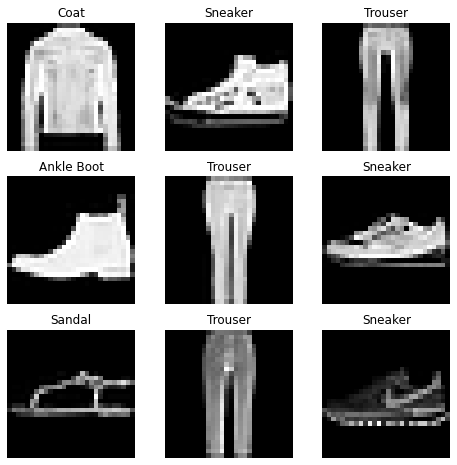

In [6]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

0.6.1
